# Jaccard index between binary masks

This notebook illustrates the calculation of the Jaccard index between the binary masks of the truth and segmentaiton results for three classes (Slum, Built-up and Non-built-up) of 5 ROIs from a 2017 GoogleEarth   image of Bangalore, India using `satsense` python library.

In [14]:
# Python and satsense imports
import os
import numpy as np
from satsense.util.mask import load_mask_from_file

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from satsense.performance.jaccard_similarity import jaccard_index_binary_masks as jibm # Jaccard index computation

In [15]:
# parameters
TRUTH_MASKS_PATH = '/home/elena/DynaSlum/Data/Bangalore/GEImages/masks/'
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Bangalore/Segmentation/'

ext = 'tif'

ROIs = ['ROI1', 'ROI2','ROI3', 'ROI4', 'ROI5']


---------------------------------------------------------------------------------------
Loading  ROI1
Visualizing  ROI1
Jacard Index computations for  ROI1
JSS between slum ground truth mask and segmentation result:  1.13443976839
JSS between builtup manual truth mask and segmentation result:  1.84221673512
JSS between non-built-up manual truth mask and segmentation result:  0.311862968548
---------------------------------------------------------------------------------------
Loading  ROI2
Visualizing  ROI2
Jacard Index computations for  ROI2
JSS between slum ground truth mask and segmentation result:  0.369944615735
JSS between builtup manual truth mask and segmentation result:  1.03755905042
JSS between non-built-up manual truth mask and segmentation result:  0.283259629108
---------------------------------------------------------------------------------------
Loading  ROI3
Visualizing  ROI3
Jacard Index computations for  ROI3
JSS between slum ground truth mask and segmentation resul

/home/elena/.local/lib/python3.5/site-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (100008360 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


Visualizing  ROI4
Jacard Index computations for  ROI4
JSS between slum ground truth mask and segmentation result:  0.113874340462
JSS between builtup manual truth mask and segmentation result:  1.76153227317
JSS between non-built-up manual truth mask and segmentation result:  0.637087545879
---------------------------------------------------------------------------------------
Loading  ROI5
Visualizing  ROI5
Jacard Index computations for  ROI5
JSS between slum ground truth mask and segmentation result:  0.205312714519
JSS between builtup manual truth mask and segmentation result:  2.38191806087
JSS between non-built-up manual truth mask and segmentation result:  0.726816109273


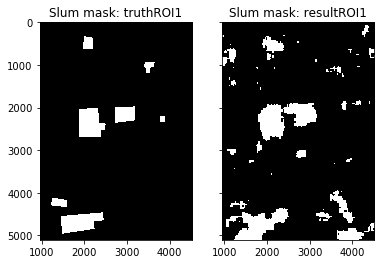

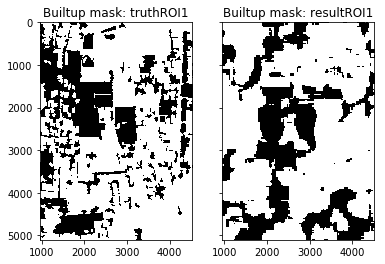

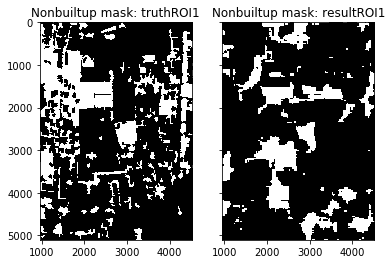

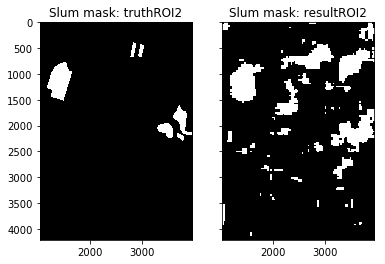

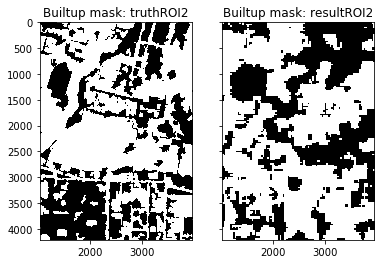

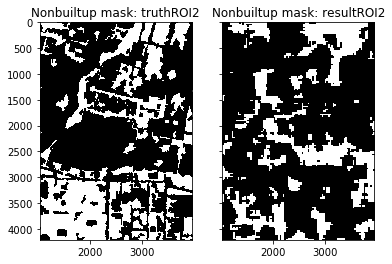

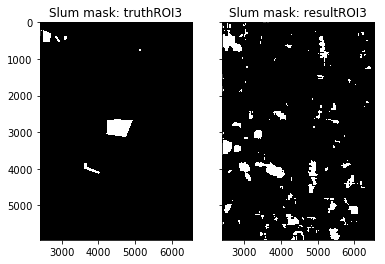

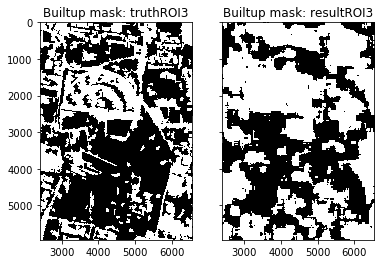

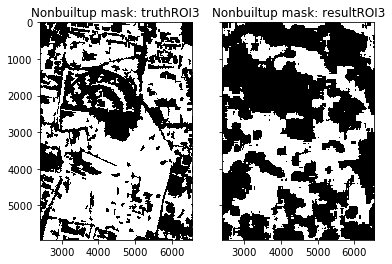

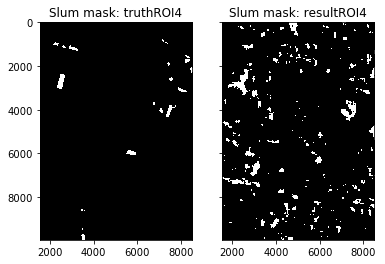

In [ ]:
# Loading, visualizations and calculations
for roi in ROIs:
    print("---------------------------------------------------------------------------------------")
    print("Loading ", roi)
    # Load the truth and segmentation masks from disk
    truth_slum_mask_fname = 'Bangalore_' + roi + '_slumMask' + '.' + ext
    truth_builtup_mask_fname = 'Bangalore_' + roi + '_builtupMask' + '.' + ext
    truth_nonbuiltup_mask_fname = 'Bangalore_' + roi + '_nonbuiltupMask' + '.' + ext

    truth_slum_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_slum_mask_fname)
    truth_builtup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_builtup_mask_fname)
    truth_nonbuiltup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_nonbuiltup_mask_fname)

    result_slum_mask_fname = 'Bangalore_' + roi + '_slumResult' + '.' + ext
    result_builtup_mask_fname = 'Bangalore_' + roi + '_builtupResult' + '.' + ext
    result_nonbuiltup_mask_fname = 'Bangalore_' + roi + '_nonbuiltupResult' + '.' + ext

    result_slum_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, result_slum_mask_fname)
    result_builtup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, result_builtup_mask_fname)
    result_nonbuiltup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, result_nonbuiltup_mask_fname)

   
    # load the masks into numpy arrays
    truth_slum_mask = load_mask_from_file(truth_slum_mask_fullfname)
    result_slum_mask = load_mask_from_file(result_slum_mask_fullfname)

    truth_builtup_mask = load_mask_from_file(truth_builtup_mask_fullfname)
    result_builtup_mask = load_mask_from_file(result_builtup_mask_fullfname)

    truth_nonbuiltup_mask = load_mask_from_file(truth_nonbuiltup_mask_fullfname)
    result_nonbuiltup_mask = load_mask_from_file(result_nonbuiltup_mask_fullfname)

    #visualization
    print("Visualizing ", roi)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(truth_slum_mask, cmap='gray'), ax1.set_title('Slum mask: truth' + roi)
    ax2.imshow(result_slum_mask,cmap='gray'), ax2.set_title('Slum mask: result' + roi)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(truth_builtup_mask,cmap='gray'), ax1.set_title('Builtup mask: truth' + roi)
    ax2.imshow(result_builtup_mask,cmap='gray'), ax2.set_title('Builtup mask: result' + roi)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(truth_nonbuiltup_mask,cmap='gray'), ax1.set_title('Nonbuiltup mask: truth' + roi)
    ax2.imshow(result_nonbuiltup_mask,cmap='gray'), ax2.set_title('Nonbuiltup mask: result' + roi)
    
    # Jaccard Index computation
    print("Jacard Index computations for ", roi)
    
    # JSS between slum ground truth mask and segmentation result
    jss_slum = jibm(truth_slum_mask, result_slum_mask)
    print("JSS between slum ground truth mask and segmentation result: ",jss_slum)

    # JSS between built-up truth mask and segmentation result
    jss_builtup = jibm(truth_builtup_mask, result_builtup_mask)
    print("JSS between builtup manual truth mask and segmentation result: ",jss_builtup)

    # JSS between non-built-up truth mask and segmentation result
    jss_nonbuiltup = jibm(truth_nonbuiltup_mask, result_nonbuiltup_mask)
    print("JSS between non-built-up manual truth mask and segmentation result: ",jss_nonbuiltup)
    
    
    